# Decision Tree for Titanic Data
### Importing the Libs

In [1]:
!pip install plotly --upgrade

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Base de dados de Titanic

- Fonte (adaptado): https://www.kaggle.com/c/titanic/data

###Exploração dos Dados

In [3]:
base = pd.read_csv('/content/titanic.csv')


In [4]:
base.shape

(891, 12)

In [5]:
base.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is noticed that there are no inconsistent values


In [7]:
base.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

It does not need the "PassengerId", "Name", "Cabin", "Ticket"

In [8]:
base = base.drop('PassengerId', axis = 1)
base = base.drop('Name', axis = 1)
base = base.drop('Ticket', axis = 1)
base = base.drop('Cabin', axis = 1)

### Missing values ​​handling

In [9]:
base.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

It is Filling the null values with the not null values mean.

In [10]:
base['Age'].fillna(base['Age'].mean(), inplace = True)
base.shape

(891, 8)

It is dropping the NaN values of 'Embarked'

In [11]:
base= base.drop(base[base['Embarked'].isna()].index)
base.shape

(889, 8)

In [12]:
base.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
base

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


### Data Visualization

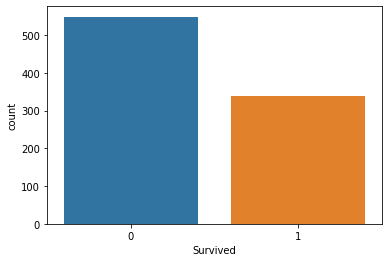

In [14]:
sns.countplot(x = base['Survived']);

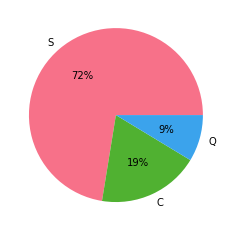

In [15]:
plt.pie(list(base.Embarked.value_counts().to_dict().values()),
        labels=list(base.Embarked.value_counts().to_dict().keys()),
        colors=sns.color_palette('husl',3),
        autopct='%.0f%%')
plt.show()

In [23]:
grafico = px.treemap(base, path=['Survived', 'Pclass', 'Embarked'])
grafico.show()

In [20]:
grafico = px.parallel_categories(base, dimensions=['Pclass', 'Sex', 'Survived'])
grafico.show()

In [24]:
grafico = px.scatter_matrix(base, dimensions=['SibSp', 'Parch', 'Fare', 'Age'], color = 'Survived')
grafico.show()

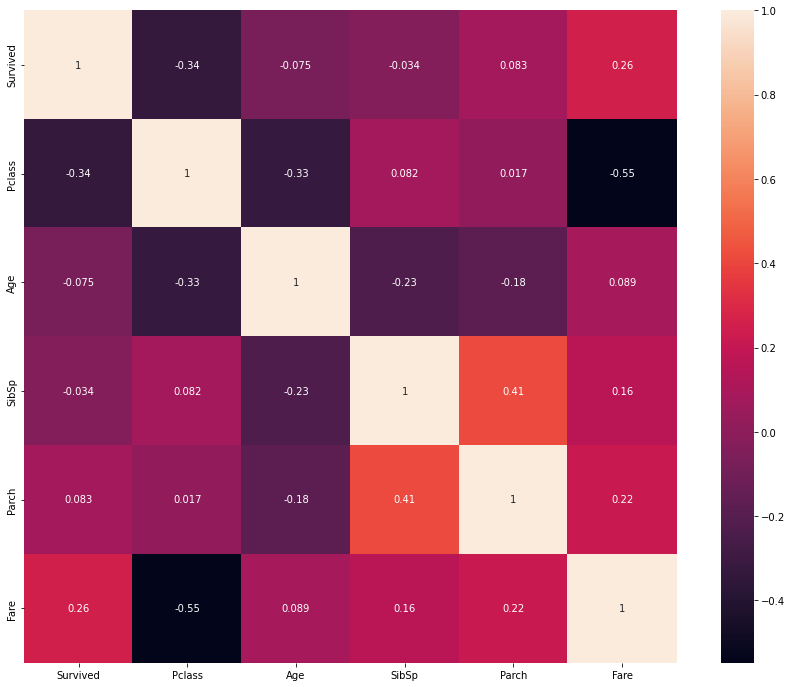

In [25]:
plt.subplots(figsize=(16,12))
sns.heatmap(
    base.corr(),
    annot=True,
    square=True,
    cbar=True
)

## Divion between predictor and class

In [26]:
base.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [44]:
X_Titanic = base.iloc[:, 1:8].values
X_Titanic

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [37]:
Y_Titanic = base.iloc[:, 0].values
Y_Titanic

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

## Categorical attribute handling


### LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder
X_Titanic[:,1] = LabelEncoder().fit_transform(X_Titanic[:,1])
X_Titanic[:,1]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [51]:
X_Titanic[:,6] = LabelEncoder().fit_transform(X_Titanic[:,6])
X_Titanic[:,6]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

## Escalation of values

In [52]:
from sklearn.preprocessing import MinMaxScaler
X_Titanic =  MinMaxScaler().fit_transform(X_Titanic)
X_Titanic

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        1.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        1.        ],
       ...,
       [1.        , 0.        , 0.36792055, ..., 0.33333333, 0.04577135,
        1.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.5       ]])

# Division of bases into training and testing

In [53]:
from sklearn.model_selection import train_test_split
X_Titanic_treinamento, X_Titanic_teste, Y_Titanic_treinamento, Y_Titanic_teste = train_test_split(X_Titanic, Y_Titanic, test_size = 0.25, random_state = 0)

In [54]:
X_Titanic_treinamento.shape, Y_Titanic_treinamento.shape

((666, 7), (666,))

In [56]:
X_Titanic_teste.shape, Y_Titanic_teste.shape

((223, 7), (223,))

## Saving the variables

In [58]:
import pickle
with open('titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_Titanic_treinamento, Y_Titanic_treinamento, X_Titanic_teste, Y_Titanic_teste], f)

##Training the Model with a Decision Tree 76,23% of precision

In [59]:
from sklearn.tree import DecisionTreeClassifier
arvore_Titanic = DecisionTreeClassifier(criterion='entropy')
arvore_Titanic.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [60]:
arvore_Titanic.feature_importances_

array([0.11226463, 0.24608242, 0.28182721, 0.05163115, 0.03510364,
       0.24839454, 0.0246964 ])

In [61]:
arvore_Titanic.classes_

array([0, 1])

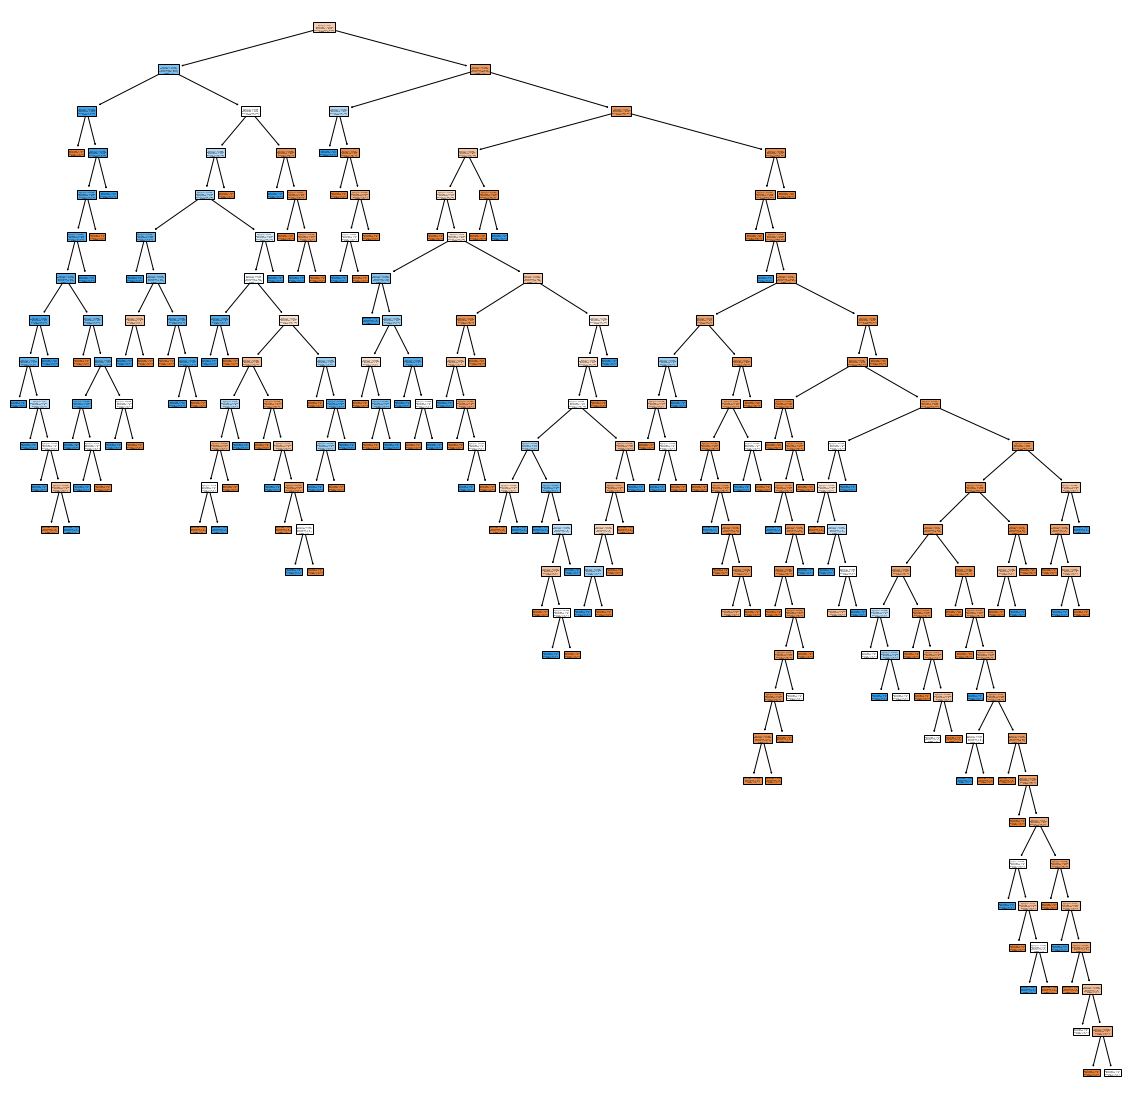

In [63]:
from sklearn import  tree
#previsores = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvore_Titanic, class_names = ['0','1'], filled=True);

In [64]:
previsoes_Titanic = arvore_Titanic.predict(X_Titanic_teste)

In [65]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_Titanic_teste, previsoes_Titanic)

0.7623318385650224

0.7623318385650224

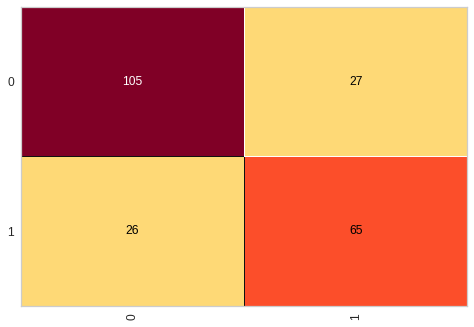

In [66]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_Titanic)
cm.fit(X_Titanic_treinamento, Y_Titanic_treinamento)
cm.score(X_Titanic_teste, Y_Titanic_teste)

In [67]:
print(classification_report(Y_Titanic_teste, previsoes_Titanic))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       132
           1       0.71      0.71      0.71        91

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

####With 2 trees 74,89%

In [75]:
random_forest_Titanic2 = RandomForestClassifier(n_estimators=2, criterion='entropy', random_state = 0)
random_forest_Titanic2.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=2, random_state=0)

In [76]:
previsoes2 = random_forest_Titanic2.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes2)

0.7488789237668162

#### With 5 Trees 80,27%

In [77]:
random_forest_Titanic5 = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state = 0)
random_forest_Titanic5.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [78]:
previsoes5 = random_forest_Titanic5.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes5)

0.8026905829596412

#### With 40 Trees 78,03%

In [83]:
random_forest_Titanic40 = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_Titanic40.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [84]:
previsoes40 = random_forest_Titanic40.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes40)

0.7802690582959642

#### With 10 Trees 79,37%

In [93]:
random_forest_Titanic10 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
random_forest_Titanic10.fit(X_Titanic_treinamento, Y_Titanic_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [94]:
previsoes10 = random_forest_Titanic10.predict(X_Titanic_teste)
accuracy_score(Y_Titanic_teste, previsoes10)

0.7937219730941704

The best is with 5 Trees

0.8026905829596412

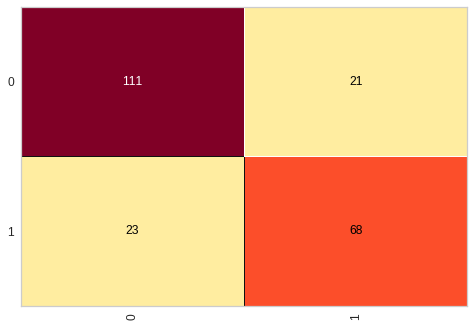

In [95]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_Titanic5)
cm.fit(X_Titanic_treinamento, Y_Titanic_treinamento)
cm.score(X_Titanic_teste, Y_Titanic_teste)

In [96]:
print(classification_report(Y_Titanic_teste, previsoes5))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       132
           1       0.76      0.75      0.76        91

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.80      0.80      0.80       223

